In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import casadi as ca
from decision_vars import *

In [2]:
# Test named dict
d = NamedDict('test/', {'a':3})
print(d['a'])
print(d.get('test/a'))
print(d.keys())
for k in d.keys():
    print(d.get(k))


3
3
dict_keys(['test/a'])
3


In [4]:
# Test decision vars
dvs = DecisionVarDict(attr_names = ['lb'], name = 'funtimes/')
dvs.add_vars({'x':[1.0, 2.0]}, lb={'x':[0, 0]})
print(dvs)
print(dvs['funtimes/x'])
print(dvs.get('funtimes/x'))
print(dvs.get_from_shortname('x'))
dvs2 = DecisionVarDict(attr_names = ['lb'], name = 'ouble/')
dvs2.add_vars(init={'x':2.0}, lb={'y':3.0})
dvs += dvs2
print(dvs.vectorize_attr('lb'))
d2 = dvs.dictize(np.array([0.1, 0.3, 0.5]))
print(d2)
print(d2.keys())


***** Decision Vars, name: funtimes/ *****
Attributes: ['lb']
Vars: 
  funtimes/x: [x_0, x_1], shape: (2, 1)

[x_0, x_1]
[x_0, x_1]
[x_0, x_1]
[0, 0, -inf]
{'funtimes/funtimes/x': DM([0.1, 0.3]), 'funtimes/ouble/x': DM(0.5)}
dict_keys(['funtimes/funtimes/x', 'funtimes/ouble/x'])


In [5]:
a = DecisionVarDict(attr_names = ['lb'], name = '')
a.add_vars({'q':[1.0, 2.0]}, lb={'q':[0, 0]})

b = DecisionVarDict(attr_names = ['lb'], name = 'free/')
b.add_vars({'q':[1.0, 2.0]}, lb={'q':[0, 0]})

a += b
print(a)
print(a['q'][0] is b['free/q'][0])

print(b.get_vars('init'))


print(a.get_vectors())
print(a.get_vars())
print(a.get_vars('lb'))
print(a.vectorize_attr())
print(a.dictize(a.vectorize_attr()))
print(a.clone_and_extend(2).keys())


***** Decision Vars, name:  *****
Attributes: ['lb']
Vars: 
  q: [q_0, q_1], shape: (2, 1)
  free/q: [q_0, q_1], shape: (2, 1)

False
{'free/q': array([1., 2.])}
()
{'q': SX([q_0, q_1]), 'free/q': SX([q_0, q_1])}
{'q': array([0, 0]), 'free/q': array([0, 0])}
[q_0, q_1, q_0, q_1]
{'q': SX([q_0, q_1]), 'free/q': SX([q_0, q_1])}
dict_keys(['q', 'free/q'])


In [6]:
a = DecisionVarDict(attr_names = ['lb'], name = '')
a.add_vars({'q':[1.0, 2.0]}, lb={'q':[0, 0]})

b = DecisionVarDict(attr_names = ['lb'], name = 'free/')
b.add_vars({'q':[1.0, 2.0]}, lb={'q':[0, 0]})

a += b

print(a.clone_and_extend(3))
print(a.clone_and_vectorize('xi'))
print(a.clone_and_vectorize('xi').clone_and_extend(3).get_vars('lb'))

***** Decision Vars, name:  *****
Attributes: ['lb']
Vars: 
  q: 
[[q_0, q_2, q_4], 
 [q_1, q_3, q_5]], shape: (2, 3)
  free/q: 
[[free/q_0, free/q_2, free/q_4], 
 [free/q_1, free/q_3, free/q_5]], shape: (2, 3)

***** Decision Vars, name:  *****
Attributes: ['lb']
Vars: 
  xi: [q_0, q_1, q_0, q_1], shape: (4, 1)

{'xi': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])}


In [7]:
from robot import *
rob = Robot('config/franka.urdf', name = 'test/')
print(rob._state)
rob.build_step(0.1)
print(rob.step)
print(rob._state.clone_and_extend(2))

***** Decision Vars, name: test/ *****
Attributes: []
Vars: 
  test/q: [q_0, q_1, q_2, q_3, q_4, q_5, q_6], shape: (7, 1)
  test/dq: [dq_0, dq_1, dq_2, dq_3, dq_4, dq_5, dq_6], shape: (7, 1)

step:(test/q[7],test/dq[7],M_inv[7x7],tau_input[7])->(q[7],dq[7],cost) SXFunction
***** Decision Vars, name: test/ *****
Attributes: []
Vars: 
  test/q: 
[[q_0, q_7], 
 [q_1, q_8], 
 [q_2, q_9], 
 [q_3, q_10], 
 [q_4, q_11], 
 [q_5, q_12], 
 [q_6, q_13]], shape: (7, 2)
  test/dq: 
[[dq_0, dq_7], 
 [dq_1, dq_8], 
 [dq_2, dq_9], 
 [dq_3, dq_10], 
 [dq_4, dq_11], 
 [dq_5, dq_12], 
 [dq_6, dq_13]], shape: (7, 2)



In [8]:
from contact import Contact
pars = {'pos': [0, 0, 0],
        'stiff': [0, 10, 10],
        'rest':[0, 0, 0.0]}
c = Contact('friendo/', pars)
q = ca.SX.sym('q',7)
p, R = rob.fwd_kin(q)
print(c.get_force({'p':ca.DM([0.5, 0.3, -0.5]), 'R':ca.DM.ones(3)}))

c2 = Contact('c2/',pars, ['stiff'], {'cov_init':{}, 'proc_noise':{}})
print(c2.get_force({'p':ca.DM([0.5, 0.3, -0.5]), 
                    'R':ca.DM.ones(3), 
                    'c2/stiff':ca.DM([10, 0, 0])}))

AttributeError: 'Contact' object has no attribute '_Contact__F_fn'

(-3.0, 6.0)

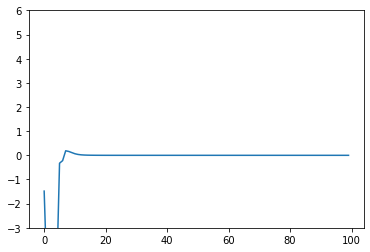

In [80]:
## Test convergence
import matplotlib.pyplot as plt
from robot import Robot
par1 = {'pos': [0, 0, 0.0],
        'stiff': [0, 0, 2e4],
        'rest':[0, 0, 0.2]}
par2 = {'pos': [0, 0, 0],
        'stiff': [0, 2e4, 0],
        'rest': [0, 0.5, 0]}
c1 = Contact('c1/', par1, [], {'cov_init':{}, 'proc_noise':{}})
c2 = Contact('c2/', par2, [], {'cov_init':{}, 'proc_noise':{}})

rob = Robot('config/franka.urdf', subsys = [c1, c2], name = 'test/', visc_fric = 50)
rob.build_step(0.02)
#print(rob.get_state(1))
# test that it converges as expected 
q = np.zeros(7)
dq = np.zeros(7)
tau = np.zeros(7)
state = NamedDict('test/', {'q':q, 'dq':dq})
inp_args = dict(tau_input=tau, M_inv=rob.inv_mass_fn(state['q']))
z = []
for _ in range(100):
    inp_args.update(state)
    res = rob.step(**inp_args)
    state['q'] = res['q']
    state['dq'] = res['dq']
    res_dict = rob.get_ext_state(state)
    #print(res_dict['dx'].T)
    z.append(res_dict['dx'][2])
    
plt.plot(z)
plt.ylim(-3, 6)


In [48]:
from robot import Robot
from contact import Contact
par1 = {'pos': [0, 0, 0.0],
        'stiff': [0, 0, 100],
        'rest':[0, 0, 0.2]}
par2 = {'pos': [0, 0, 0],
        'stiff': [0, 100, 0],
        'rest': [0, 0.5, 0]}
c1 = Contact('c1/', par1, ['stiff'], {'cov_init':{}, 'proc_noise':{}})
c2 = Contact('c2/', par2, [], {'cov_init':{}, 'proc_noise':{}})

rob = Robot('config/franka.urdf', subsys = [c1, c2])


In [9]:
# Check that the spawner works
from helper_fns import spawn_models
models, _, _ = spawn_models('config/franka.yaml', 'config/attrs.yaml', 'config/contact.yaml', sym_vars = [])
for name, model in models.items():
    model.build_step(step_size=0.1)
    n_in = model.step.size_in(0)
    res = model.step(np.zeros(7), np.zeros(7), np.eye(7), np.zeros(7))
    print(f"{name} has step fn of {model.step}")
    print(f"  which evals to {res}")


ModuleNotFoundError: No module named 'rospy'

In [4]:
# Check the switched mdel 
from helper_fns import spawn_switched_models, spawn_models
robots_sw, contacts = spawn_switched_models(robot_path = "config/franka.yaml",
                                            contact_path = "config/contact.yaml",
                                            attr_path  = "config/attrs.yaml", 
                                            mode = "point")
_, robots, contacts = spawn_models(robot_path = "config/franka.yaml",
                                         contact_path = "config/contact.yaml",
                                         attr_path  = "config/attrs.yaml")


rsw = robots_sw['free']
r = robots['point']
rsw.build_step(0.05)
r.build_step(0.05)

q0 = np.ones(7)
dq0 = -0.5*np.ones(7)
state = {'point/q': q0,
         'point/dq': dq0,
         'M_inv': r.inv_mass_fn(q0),
         'imp_stiff':0*ca.DM.ones(3),
         'imp_rest': [0,0,0]}
xsw = rsw.get_ext_state(state)
x = r.get_ext_state(state)
print(x['p'])
print(x['dx'])
print(xsw['F_ext'])
print(x['F_ext'])
rob = r
print(rob.step)
for _ in range(300):
    res = rob.step.call(state)
    print(res['cost'])
    state['point/q'] = res['q']
    state['point/dq'] = res['dq']
    res_dict = rob.get_ext_state(state)    
    #print(res_dict['p'][0])
    #print(res_dict['F_ext'][0])

KeyError: 'free/q'